<img src="../img/viu_logo.png" width="200">

## 01MIAR - Actividad Valenbici



Autor: *EFRAIM ALBERTO CASAS*



Servicios desde donde se recopiló la información:
- http://www.valenbisi.es/service/carto/json
- http://www.valenbisi.es/service/stationdetails/valence/63

#### Actividad
# Punto 01 

#### Carga de datos de csv (estaciones_bici.csv) en un DataFrame


In [84]:
import pandas as pd

from os import path
#Para el ejemplo debe estar creado en archivo dentro de la carpeta res
bicis_path = path.join('res','estaciones_bici.csv')
bicis = pd.read_csv(bicis_path, sep=';')
data = bicis[['station', 'total', 'download_date', 'available']]


### Validación de la Información

In [77]:
display(data.head())

,station,total,download_date,available
0,64,20,2019-02-10 17:25:37.787,9
1,73,20,2019-02-10 17:25:37.787,6
2,63,20,2019-02-10 18:13:39.827,20
3,64,20,2019-02-10 18:13:39.827,6
4,65,19,2019-02-10 18:13:39.827,9


In [78]:
display(data.sample(10))

,station,total,download_date,available
2428,226,30,2019-02-10 20:17:52.989,3
17288,208,20,2019-02-11 12:52:05.359,9
24642,108,15,2019-02-11 20:53:17.889,8
14587,273,15,2019-02-11 09:45:54.189,5
19047,102,20,2019-02-11 14:56:18.388,13
19382,79,20,2019-02-11 15:27:22.300,5
771,225,20,2019-02-10 18:44:43.728,0
22222,122,15,2019-02-11 18:02:38.152,3
12731,38,20,2019-02-11 08:12:42.093,8
20315,9,25,2019-02-11 16:13:54.894,19


In [79]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27547 entries, 0 to 27546
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   station        27547 non-null  int64 
 1   total          27547 non-null  int64 
 2   download_date  27547 non-null  object
 3   available      27547 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 861.0+ KB


None

In [80]:
display(data.describe(include='all'))

,station,total,download_date,available
count,27547.000000,27547.000000,27547,27547.000000
unique,NaN,NaN,105,NaN
top,NaN,NaN,2019-02-11 09:14:47.430,NaN
freq,NaN,NaN,276,NaN
mean,138.449196,19.915381,NaN,8.974444
std,79.657747,5.570912,NaN,7.307137
min,1.000000,10.000000,NaN,0.000000
25%,69.000000,15.000000,NaN,3.000000
50%,139.000000,20.000000,NaN,8.000000
75%,207.000000,20.000000,NaN,14.000000



# Punto 02 

#### Obtención del número de estaciones que tienen un total de 30 bornetas


In [81]:

#Listado con mas de 30
data_total_30=data[data['total']==30]

#Estaciones unicas con 30 bornetas
num_total_30=len(pd.unique(data_total_30['station']))

print(f'Número de estaciones con 30 bornetas: { num_total_30}')



Número de estaciones con 30 bornetas: 11


### Otra forma de hacerlo

In [22]:
#Otra forma de hacerlo

#Agrupamos por estación
data_group=data.groupby('station').max()

#Contamos dentro de la agrupación
num_total_30=len(data_group[data_group['total']==30])

print(f'Número de estaciones con 30 bornetas forma 2: { num_total_30}')


Número de estaciones con 30 bornetas forma 2: 11


# Punto 03 

#### Número de estación con la media más alta de bicis disponibles


In [24]:
#Se agrupan los datos por estación
data_mean_by_station=data.groupby('station').mean()

#Se asigna la estación con mayor media de bicicletas disponibles
most_available_station=data_mean_by_station['available'].idxmax()

print(f'Estación con la media más alta: {most_available_station}')



Estación con la media más alta: 50


### Verificación

In [82]:
#Se ordena y se muestra  con el fin de verificar que se la misma estación
display(data_mean_by_station.sort_values(by='available', ascending=False))

,total,available
station,,
50,40.0,31.260000
112,40.0,24.868687
93,38.0,23.767677
90,40.0,22.656566
53,25.0,22.151515
...,...,...
269,15.0,1.000000
240,20.0,0.990000
266,18.0,0.363636


# Punto 04 

#### Realizar el histograma de bicis disponibles de la estación del punto anterior


In [83]:
#Se crea un Dataframe solo con la info de la estación con mas bicis disponibles
data_only_most_available=data[data['station']==most_available_station].copy()

display(data_only_most_available.sample(10))

,station,total,download_date,available
17435,50,40,2019-02-11 13:23:06.921,29
3937,50,40,2019-02-10 22:06:31.767,28
20268,50,40,2019-02-11 16:13:54.894,32
26791,50,40,2019-02-11 23:12:58.602,33
14122,50,40,2019-02-11 09:30:22.964,40
6975,50,40,2019-02-11 01:44:00.899,27
7251,50,40,2019-02-11 01:59:34.790,27
27067,50,40,2019-02-11 23:28:29.903,32
10258,50,40,2019-02-11 05:05:57.243,27
24684,50,40,2019-02-11 20:53:17.889,32


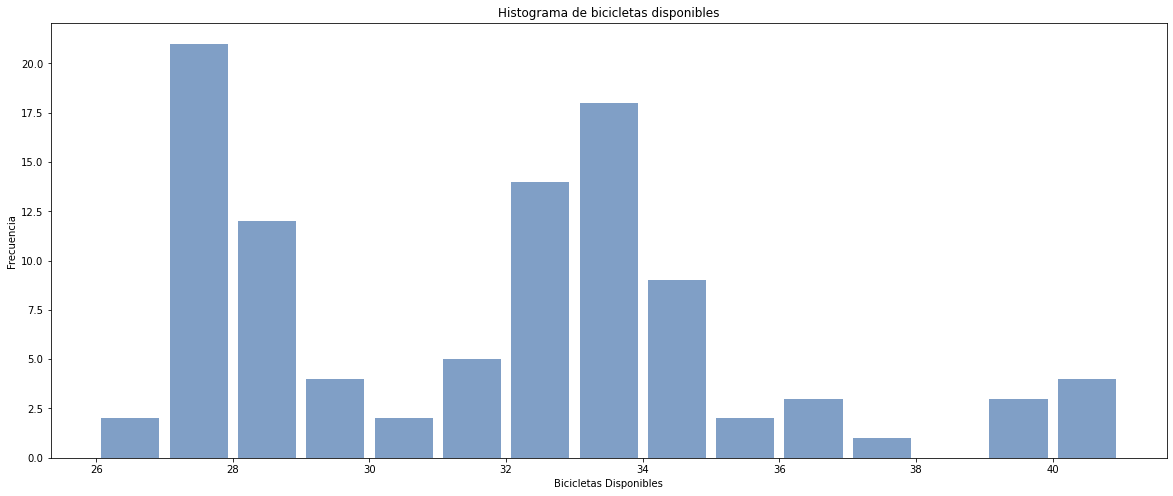

In [67]:
import matplotlib.pyplot as plt


intervalos = range(min(data_only_most_available['available']), 
                    max(data_only_most_available['available']) + 2) 

plt.hist(x=data_only_most_available['available'],  
        bins=intervalos,  
        color='#6087b8',
         label='Bicicletas disponibles',linewidth=1,alpha=0.8
        , rwidth=0.85)

plt.gcf().set_size_inches(20, 8)
plt.title('Histograma de bicicletas disponibles' )
plt.xlabel('Bicicletas Disponibles')
plt.ylabel('Frecuencia')
plt.show()


### Con Seaborn

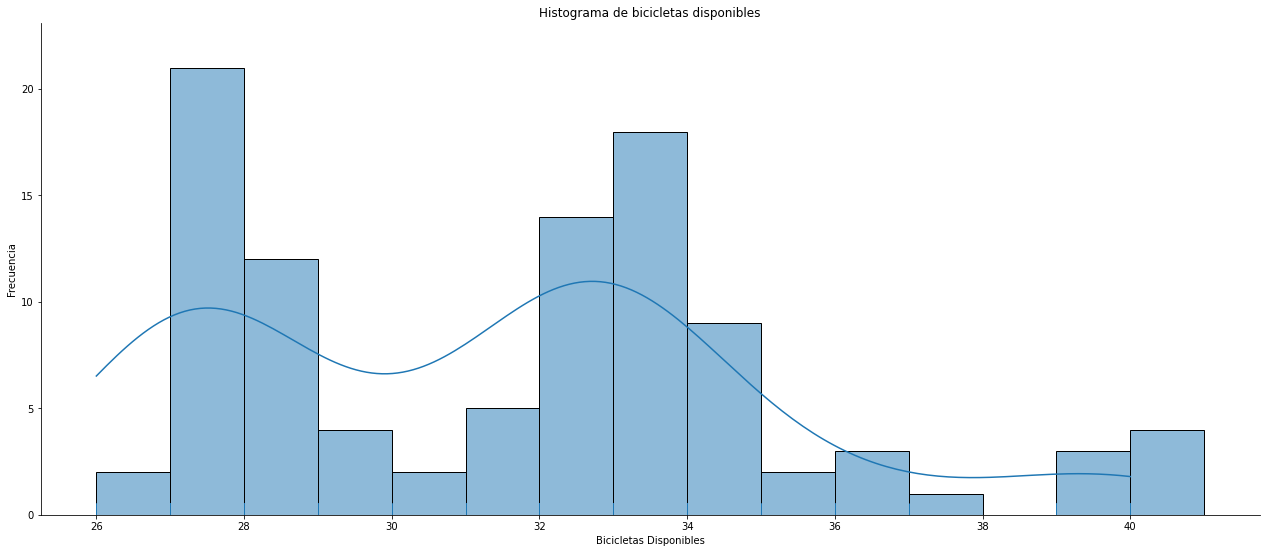

In [74]:
import seaborn as sns

sns.displot(data_only_most_available['available'],             
            kde=True, 
            bins=intervalos, 
            rug=True)
plt.gcf().set_size_inches(20, 8)
plt.title('Histograma de bicicletas disponibles' )
plt.xlabel('Bicicletas Disponibles')
plt.ylabel('Frecuencia')
plt.show()

In [49]:
#mostrar la informacón de forma tabular

data_only_most_available.groupby(by='available').count().sort_values(by='station',ascending=False )

,station,total,download_date
available,,,
27,21,21,21
33,18,18,18
32,14,14,14
28,12,12,12
34,9,9,9
31,5,5,5
29,4,4,4
40,4,4,4
36,3,3,3


# Punto 05  
#### Realizar gráfica con  la línea temporal de bicis disponibles de la estación del punto anterior. Pista, es necesario cambiar el índice a uno tipo fecha

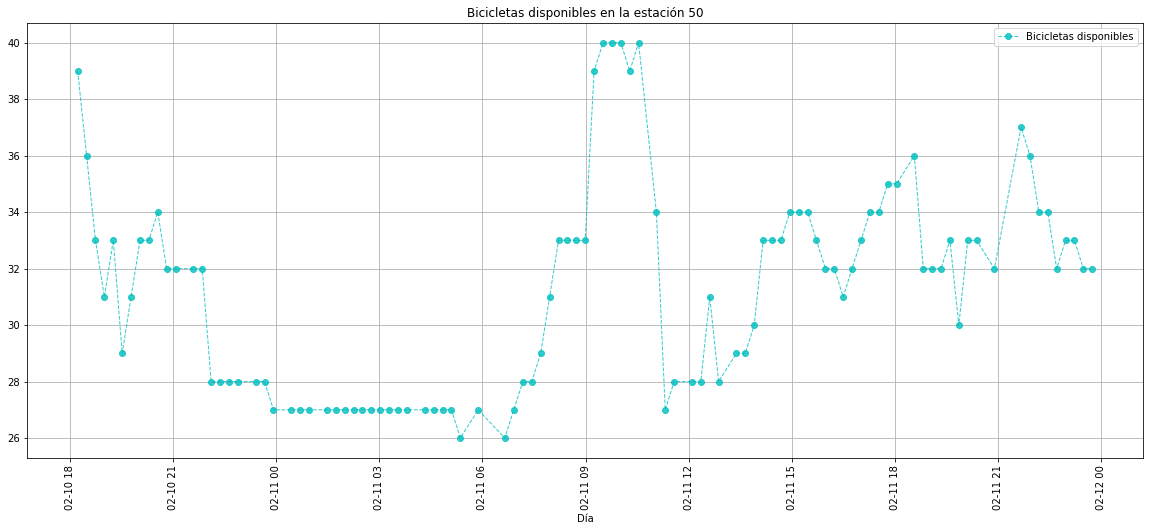

In [92]:
from datetime import datetime



format='%Y-%m-%d %H:%M:%S.%f'
data_only_most_available['download_date'] = pd.to_datetime(data_only_most_available['download_date'], format=format)

#Esta sería otra forma más directa, 
# (personalmente prefiero especificar el formato para evitar problemas posteriores  cuando se hacen despliegues en ambientes productivos)
#data_only_most_available['download_date'] = data_only_most_available['download_date'].astype('datetime64') #Otra forma

#Se crea el gráfico
plt.plot( data_only_most_available['download_date'], 
          data_only_most_available['available'], 'co--',
         label='Bicicletas disponibles',linewidth=1,alpha=0.8)

plt.legend(loc='best') 
plt.xlabel('Día')
plt.title('Bicicletas disponibles en la estación 50')

plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 8)
plt.grid()
plt.show()

### Con Seaborn

No handles with labels found to put in legend.


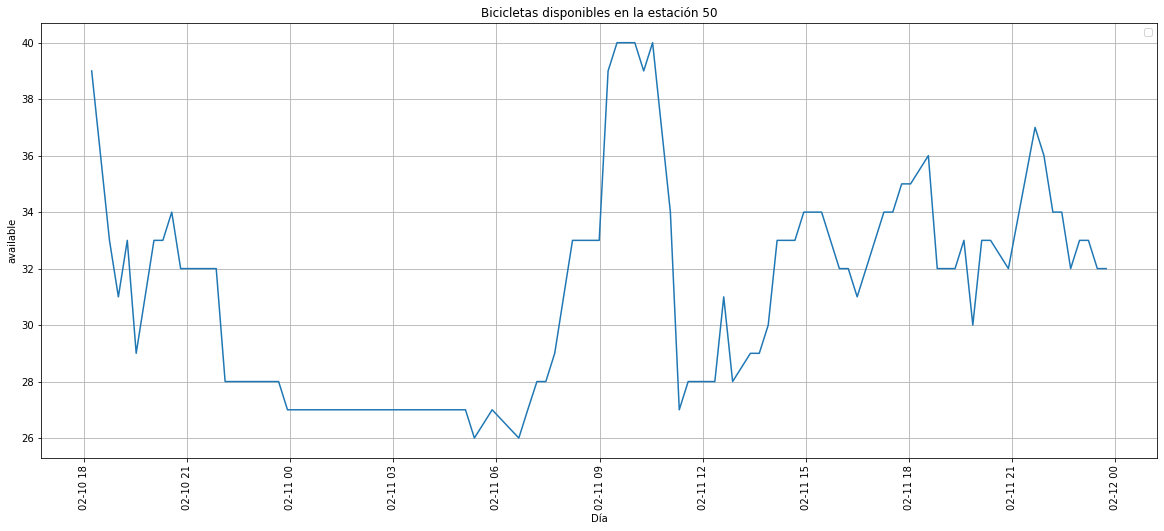

In [94]:
sns.lineplot(data = data_only_most_available,
             x ='download_date',
             y ='available',
             markers=True,
             dashes=False)

plt.legend(loc='best') 
plt.xlabel('Día')
plt.title('Bicicletas disponibles en la estación 50')

plt.xticks(rotation=90)
plt.gcf().set_size_inches(20, 8)
plt.grid()
plt.show()